<a href="https://colab.research.google.com/github/FernandoVina/Challenge-1-DS-/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# Función para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Análisis de facturación
total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
        precio = float(venta['Precio'])  # Solo sumamos el precio
        facturacion_tienda += precio

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda

# Mostrar facturación total
print(f"\nFacturación total de todas las tiendas: ${total_facturacion:.2f}")


Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


Respecto del nivel de ventas la tienda 1 vende 10,8% mas que la tienda 4, esta ultima es la menor ventas.

# 2. Ventas por categoría

In [10]:
#función para contar productos por categoria y conviertiendolo a Df
def conteo_categoria(df, nombre_tienda):
    conteo = df.groupby('Categoría del Producto').size().reset_index(name ='Cantidad')
    conteo['Tienda'] = nombre_tienda
    return conteo

#aplicar a la funcion por cada tienda
t1 = conteo_categoria(tienda, 'Tienda 1')
t2 = conteo_categoria(tienda2, 'Tienda 2')
t3 = conteo_categoria(tienda3, 'Tienda 3')
t4 = conteo_categoria(tienda4, 'Tienda 4')

#uniendo todo para gráficar
total = pd.concat([t1, t2, t3, t4], ignore_index=True)
total



,Categoría del Producto,Cantidad,Tienda
0,Artículos para el hogar,171,Tienda 1
1,Deportes y diversión,284,Tienda 1
2,Electrodomésticos,312,Tienda 1
3,Electrónicos,448,Tienda 1
4,Instrumentos musicales,182,Tienda 1
5,Juguetes,324,Tienda 1
6,Libros,173,Tienda 1
7,Muebles,465,Tienda 1
8,Artículos para el hogar,181,Tienda 2
9,Deportes y diversión,275,Tienda 2


from matplotlib import pyplot as plt
total['Cantidad'].plot(kind='hist', bins=20, title='Cantidad')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
total.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
total.groupby('Tienda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total['Cantidad'].plot(kind='line', figsize=(8, 4), title='Cantidad')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Tienda'].value_counts()
    for x_label, grp in total.groupby('Categoría del Producto')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Categoría del Producto')
_ = plt.ylabel('Tienda')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(total['Categoría del Producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(total, x='Cantidad', y='Categoría del Producto', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(total['Tienda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(total, x='Cantidad', y='Tienda', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

las 4 tiendas tienen ventas unitarias totales similares, alrededor de las 2.359 unidades cada una, y sus mayores ventas unitarias por rubro son muebles y electronicos en cada una de las tiendas.

# 3. Calificación promedio de la tienda


In [ ]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Calcular la calificación promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    # Variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            # Intentamos con diferentes posibles nombres de columna
            if 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            elif 'Calificacion' in producto:
                calificacion = float(producto['Calificacion'])
            elif 'calificación' in producto:
                calificacion = float(producto['calificación'])
            elif 'calificacion' in producto:
                calificacion = float(producto['calificacion'])
            else:
                # Si no encontramos la columna, imprimimos las claves disponibles
                print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                raise KeyError("No se encontró la columna de calificación")

            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que no se pueden convertir a float
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificación promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


La mejor tienda evaluada es la dos y tres, sin embargo las diferenciacias con las otras 2 en mi opinion no son significativas. Ejemplo: la tienda 3 sobre la 1 es solo del 1,7%

In [20]:
from collections import defaultdict

# 4. Productos más y menos vendidos

In [21]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Función para calcular Top 3 más y menos dinero generado
def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        # Ahora solo usamos el precio (no multiplicamos por cantidad de cuotas)
        ingreso_por_producto[producto] += precio

    # Convertimos a lista ordenada
    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MÁS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

# Recorrer todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $696900.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cuerda para saltar - Ingresos: $652800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856900.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cubo mágico 8x8 - Ingresos: $643600.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853800.00
  Dinosaurio Rex -

a pesar que la tienda 1 se destaca por vender mas producto en tres categorias como TV LED, Refigeradoes y IPHONE, pero sus 3 de menores en baja. En las ventas totales no hay una diferencia significativa, seria solo del 10% respecto de la tienda 4.

# 5. Envío promedio por tienda

el costo de envio promedio es mas alto en la tienda 1 respecto de las demas. Al contrario la tienda 4 tiene el promedio mas bajo.

In [18]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de envío'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Envío promedio: ${promedio_envio:.2f}")

# Procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Envío promedio: $26018.61
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


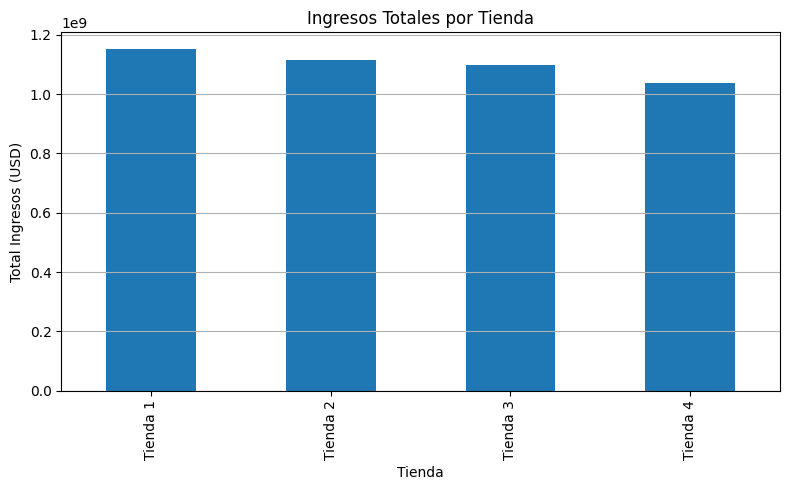

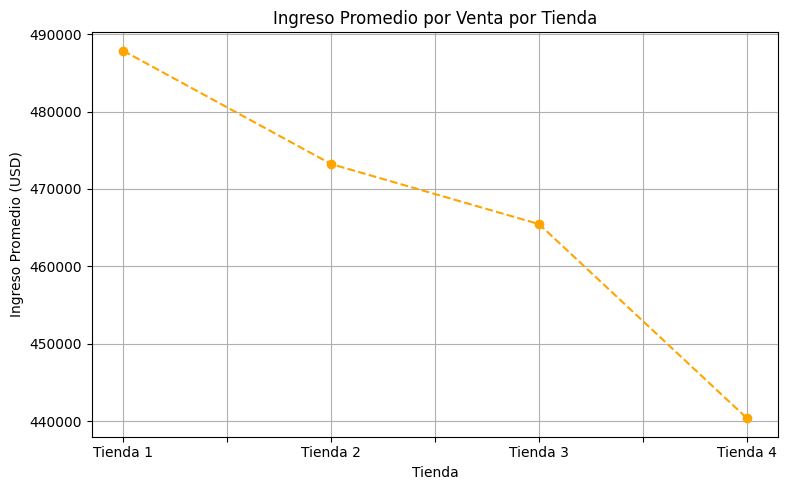

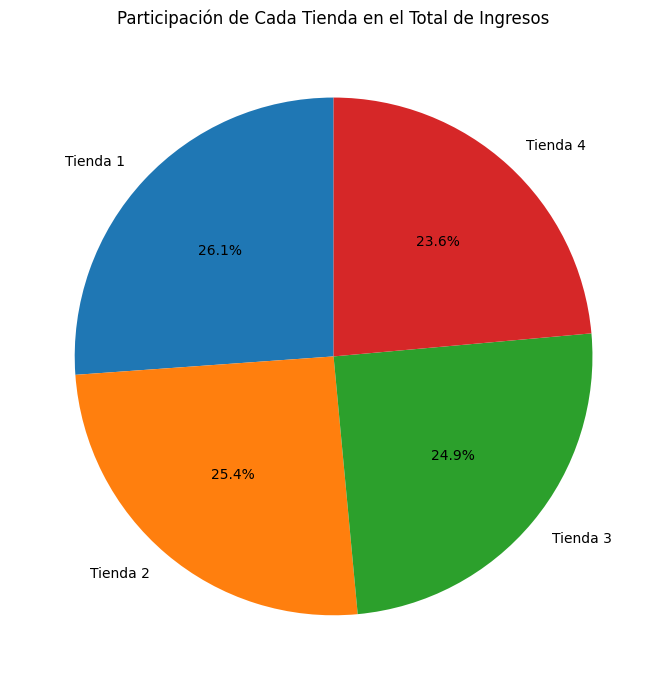

In [25]:
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if this cell is run independently

# Combine the original store data into a single DataFrame
# Add a 'Tienda' column to each DataFrame before concatenating
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenate the DataFrames
df_combined = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Convert 'Precio' to numeric, handling potential errors
df_combined['Precio'] = pd.to_numeric(df_combined['Precio'], errors='coerce')

# Drop rows where 'Precio' is not a valid number
df_combined.dropna(subset=['Precio'], inplace=True)

# The ingreso of each venta is simply the precio
df_combined['Ingreso'] = df_combined['Precio']

# Agrupar datos
ingresos_totales = df_combined.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_combined.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales # This remains the same as total income distribution

# 🎨 Graficar 3 gráficos verdaderamente diferentes

# 1. Barra vertical: Total de ingresos
plt.figure(figsize=(8,5))
ingresos_totales.plot(kind='bar')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Línea: Promedio de ingreso por venta
plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Torta/Pie: Distribución del total
plt.figure(figsize=(7,7))
distribucion_ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participación de Cada Tienda en el Total de Ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()

**CONCLUSION**
De acuerdo a las cifras y datos disponibles,  para tomar una recomendacion certera se solicita entregar mayor información, dado que no se cuenta por ejemplo con  datos de costos de los productos, solo se tiene el costo de envio por ejemplo, y gastos de administración y ventas entre otros. Se deberia contar con un estado de resultado o de perdidas y ganancias por cada tienda a la fecha y histórico para tomar una decision correcta. Ademas de información de mercado de cada geografia de las tiendas y planes de marketing vigentes.